In [25]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os
import pandas as pd

In [2]:
SONGS_DIR = './songs/'
START_YEAR = 1990
END_YEAR = 2023
FILE_PATHS = [os.path.join(SONGS_DIR, str(year)+'.csv') for year in np.arange(START_YEAR, END_YEAR+1)]
COLUMN_NAMES = ['title', 'artist', 'lyrics']

df_dict = {k:[] for k in COLUMN_NAMES}
df = pd.DataFrame()

for i, file_path in enumerate(FILE_PATHS):
    file_df = pd.read_csv(file_path)
    file_df['year'] = pd.Series([START_YEAR+i for _ in range(file_df.shape[0])])
    df = pd.concat([df, file_df])

In [3]:
def count_songs_per_year(df):
    return df['year'].value_counts().index, df['year'].value_counts().values

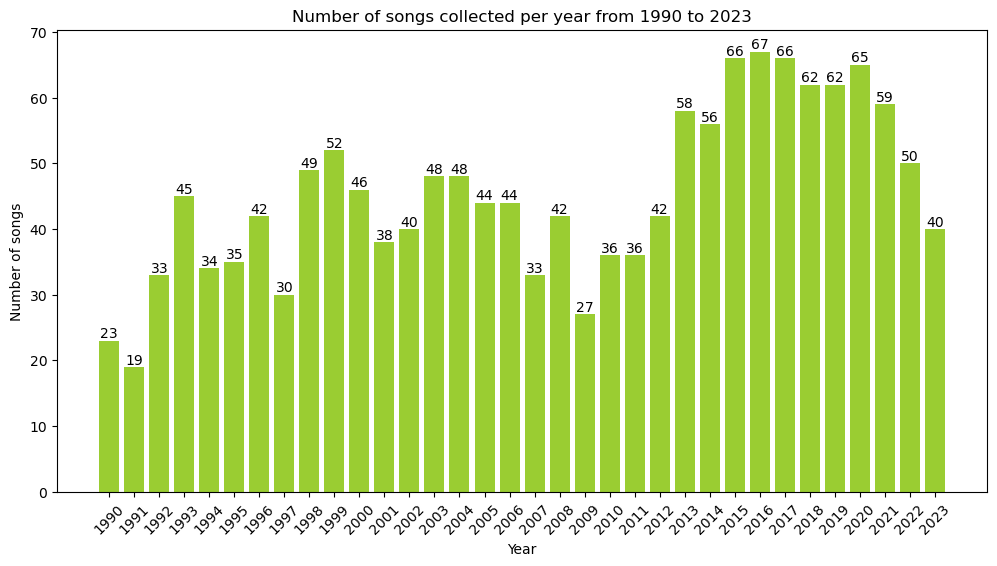

In [24]:
fig, ax = plt.subplots(figsize=(12,6))
years, counts = count_songs_per_year(df)
ax.set_title('Number of songs collected per year from 1990 to 2023')
ax.set_xticks(years,labels=years,rotation=45)
bars = ax.bar(height=counts,x=years,color='yellowgreen')
ax.bar_label(bars, labels=counts)
ax.set_xlabel('Year')
ax.set_ylabel('Number of songs')
plt.show()